# Компьютерная геометрия и геометрическое моделирование
## Лабораторная работа №4
- Ф.И.О: **Мухамедияр Адиль**
- Ноиер студ. билета: **1032205725**
- Группа: **НКНбд-01-20**

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon
import numpy as np
from PIL import Image

## №1

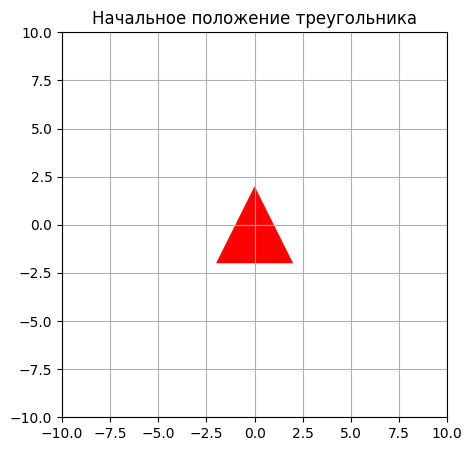

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Определение треугольника в локальной системе координат
triangle = np.array([
    [-1, -1, 1],
    [1, -1, 1],
    [0, 1, 1]
])

# Начальное положение объекта (центр глобальной системы координат, не повернут)
M = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
])

triangle_mt=triangle @ M.T

# Отображение треугольника в начальном положении
def plot_polygon(polygon, title=""):
    plt.figure(figsize=(5,5))
    plt.fill(polygon[:, 0], polygon[:, 1], 'r-')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_polygon(triangle_mt, "Начальное положение треугольника")

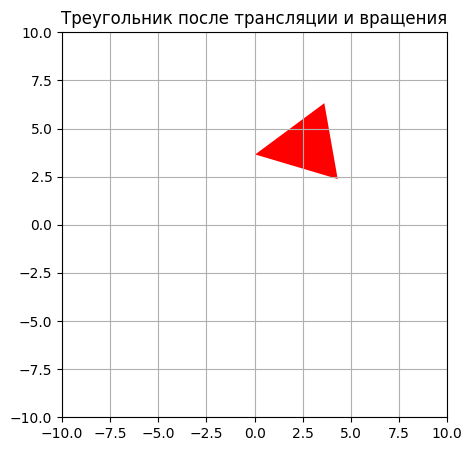

In [6]:
# Трансляция на (3, 2)
translation_matrix = np.array([
    [1, 0, 1],
    [0, 1, 2],
    [0, 0, 1]
])

# Вращение на 100 градусов против часовой стрелки
theta = np.radians(100)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Применение преобразований
transformed_triangle = triangle_mt @ (translation_matrix @ rotation_matrix).T

# Отображение результата
plot_polygon(transformed_triangle, "Треугольник после трансляции и вращения")

-----

## № 2

In [7]:
import os

# Создаем директорию для сохранения изображений
output_dir = "/content"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Количество кадров
num_frames = 36

# Угол вращения для каждого кадра
angle_per_frame = 360 / num_frames

# Функция для сохранения изображений
def save_polygon_frame(polygon, frame_num):
    plt.figure(figsize=(5,5))
    plt.fill(polygon[:, 0], polygon[:, 1], 'b-')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(os.path.join(output_dir, f"frame_{frame_num:03d}.png"))
    plt.close()

# Создание кадров
for i in range(num_frames):
    theta = np.radians(angle_per_frame)
    rotation_matrix = np.array([
        [np.cos(i), -np.sin(i), 0],
        [np.sin(i), np.cos(i), 0],
        [0, 0, 1]
    ])
    rotated_triangle = triangle_mt @ rotation_matrix.T
    save_polygon_frame(rotated_triangle, i)

# Путь к первому кадру (для проверки)
first_frame_path = os.path.join(output_dir, "frame_000.png")
first_frame_path

'/content/frame_000.png'

In [8]:
import subprocess

cmd = "ffmpeg -framerate 10 -i /content/frame_%03d.png -c:v libx264 -pix_fmt yuv420p triangle_animation.mp4"
subprocess.run(cmd, shell=True)

CompletedProcess(args='ffmpeg -framerate 10 -i /content/frame_%03d.png -c:v libx264 -pix_fmt yuv420p triangle_animation.mp4', returncode=0)

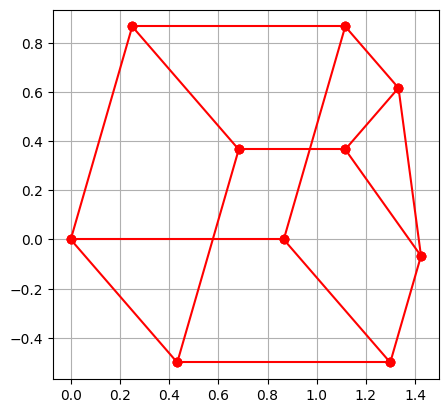

In [37]:
import numpy as np

class Polyhedron:
    def __init__(self, vertices, edges):
        self.vertices = vertices
        self.edges = edges
        self.transformed_vertices = np.copy(vertices)

    def trimetric_projection(self, alpha, beta, gamma):
        """
        Применяем триметрическую проекцию к вершинам, используя указанные углы
        """
        alpha = np.radians(alpha)
        beta = np.radians(beta)
        gamma = np.radians(gamma)

        M = np.array([
            [np.cos(beta), np.sin(alpha)*np.sin(beta), -np.sin(beta)*np.cos(alpha)],
            [0, np.cos(alpha), np.sin(alpha)],
            [np.sin(beta), -np.sin(alpha)*np.cos(beta), np.cos(alpha)*np.cos(beta)]
        ])

        for i, vertex in enumerate(self.vertices):
            self.transformed_vertices[i] = np.dot(M, vertex)

    def plot(self):
        """
        Рисуем преобразованную фигуру
        """
        fig, ax = plt.subplots()
        for edge in self.edges:
            points = self.transformed_vertices[edge].T
            ax.plot(points[0], points[1], 'ro-')
        ax.set_aspect('equal', 'box')
        plt.grid(True)
        plt.show()

# Инициализируем многогранник с предоставленными вершинами и ребрами
truncated_cube = Polyhedron(
    vertices=np.array([
        [0, 0, 1],    # 0
        [1, 0, 1],    # 1
        [1, 0.5, 1],  # 2
        [0.5, 1, 1],  # 3
        [0, 1, 1],    # 4
        [0, 0, 0],    # 5
        [1, 0, 0],    # 6
        [1, 1, 0],    # 7
        [0, 1, 0],    # 8
        [1, 1, 0.5]   # 9
    ]),
    edges=[
        [0, 1], [1, 2], [2, 3], [3, 4], [4, 0],  # верхняя грань
        [5, 6], [6, 7], [7, 8], [8, 5],  # нижняя грань
        [0, 5], [1, 6], [4, 8], [3, 9], [2, 9], [9, 7]  # вертикальные ребра
    ]
)

# Протестировали триметрическую проекцию с произвольными углами и выводим результат на график
truncated_cube.trimetric_projection(alpha=120, beta=30, gamma=60)
truncated_cube.plot()


-----

## №3

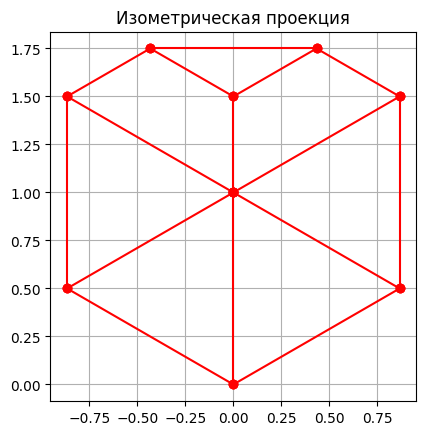

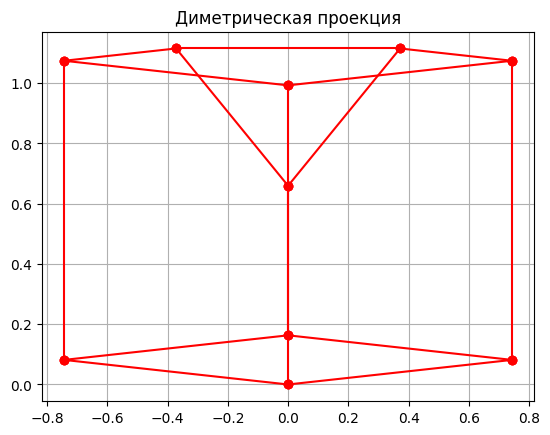

In [36]:
class Polyhedron:
    def __init__(self, vertices, edges):
        self.vertices = vertices
        self.edges = edges
        self.transformed_vertices = np.copy(vertices)

    def trimetric_projection(self, alpha, beta, gamma):
        """
        Применяем триметрическую проекцию к вершинам, используя указанные углы
        """
        alpha = np.radians(alpha)
        beta = np.radians(beta)
        gamma = np.radians(gamma)

        M = np.array([
            [np.cos(beta), np.sin(alpha)*np.sin(beta), -np.sin(beta)*np.cos(alpha)],
            [0, np.cos(alpha), np.sin(alpha)],
            [np.sin(beta), -np.sin(alpha)*np.cos(beta), np.cos(alpha)*np.cos(beta)]
        ])

        self.apply_projection(M)

    def isometric_projection(self):
        """
        Применяем изометрическую проекцию к вершинам
        """
        M = np.array([
            [np.sqrt(3)/2, 0, -np.sqrt(3)/2],
            [1/2, 1, 1/2],
            [0, 0, 0]
        ])

        self.apply_projection(M)

    def dimetric_projection(self):
        """
        Применяем диметрическую проекцию к вершинам
        Для простоты мы используем общие углы для диметрической проекции
        """
        alpha = np.radians(7)
        beta = np.radians(42)

        M = np.array([
            [np.cos(beta), 0, -np.cos(beta)],
            [np.sin(beta)*np.sin(alpha), np.cos(alpha), np.sin(beta)*np.sin(alpha)],
            [0, 0, 0]
        ])

        self.apply_projection(M)

    def apply_projection(self, M):
        """
        Применяем заданную проекционную матрицу к вершинам
        """
        for i, vertex in enumerate(self.vertices):
            self.transformed_vertices[i] = np.dot(M, vertex)

    def plot(self, title=None):
        """
        Рисуем преобразованную фигуру.
        """
        fig, ax = plt.subplots()
        for edge in self.edges:
            points = self.transformed_vertices[edge].T
            ax.plot(points[0], points[1], 'ro-')
        ax.set_aspect('equal', 'box')
        plt.grid(True)
        if title:
            plt.title(title)
        plt.show()

# Инициализируем многогранник с предоставленными вершинами и ребрами
truncated_cube = Polyhedron(
    vertices=np.array([
        [0, 0, 1],    # 0
        [1, 0, 1],    # 1
        [1, 0.5, 1],  # 2
        [0.5, 1, 1],  # 3
        [0, 1, 1],    # 4
        [0, 0, 0],    # 5
        [1, 0, 0],    # 6
        [1, 1, 0],    # 7
        [0, 1, 0],    # 8
        [1, 1, 0.5]   # 9
    ]),
    edges=[
        [0, 1], [1, 2], [2, 3], [3, 4], [4, 0],  # верхняя грань
        [5, 6], [6, 7], [7, 8], [8, 5],  # нижняя грань
        [0, 5], [1, 6], [4, 8], [3, 9], [2, 9], [9, 7]  # вертикальные ребра
    ]
)

# Построим изометрическую проекцию
truncated_cube.isometric_projection()
truncated_cube.plot(title="Изометрическая проекция")

# Построим диметрическую проекцию
truncated_cube.dimetric_projection()
truncated_cube.plot(title="Диметрическая проекция")


-----